In [13]:
import numpy as np
import matplotlib.pyplot as plt

For any convex polygon (drawn with thick lines) given as a list of its corners:

[ (x1, y1), (x2, y2) , … ] 

find a polygon that is enlarged as shown in the the diagram.

Every distance between corresponding sides of the given and the enlarged polygons equals one.

In [14]:
def get_angle_half(v1, v2, r=False):
    a = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    if r: 
        a = 2 * np.pi - a
    return a / 2


def rotate(p, a):
    # return np.dot(p, np.array([[1, -1], [1, 1]]))
    return np.dot(p, np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]]))

def concat(p):
    r = []
    l = len(p)
    for i in range(l - 1):
        if (i == 0):
            r.append([p[i], p[l-2], p[i+1]])
        else:
            r.append([p[i], p[i-1], p[i+1]])
    return r

def render(vectors):
    x, y, c = zip(*vectors)
    plt.plot(x, y, c=color)
    plt.scatter(x, y, c=color)

    plt.axis('equal')
    plt.show()


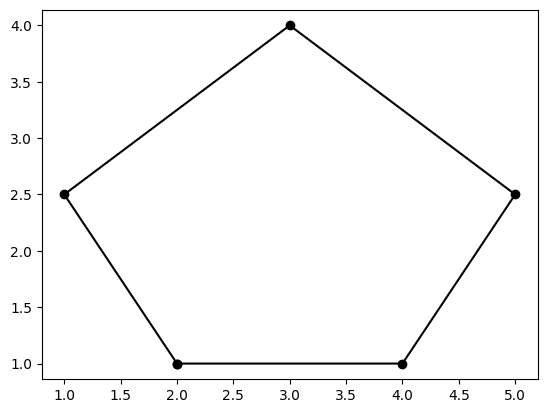

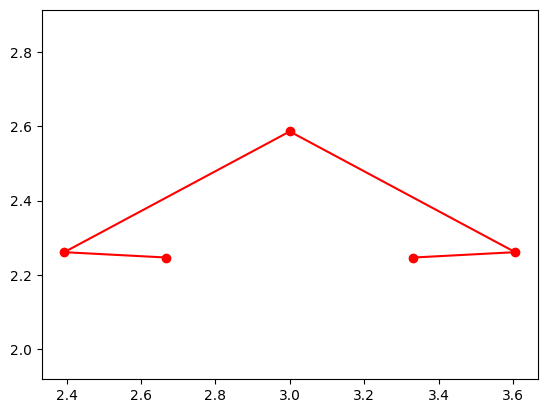

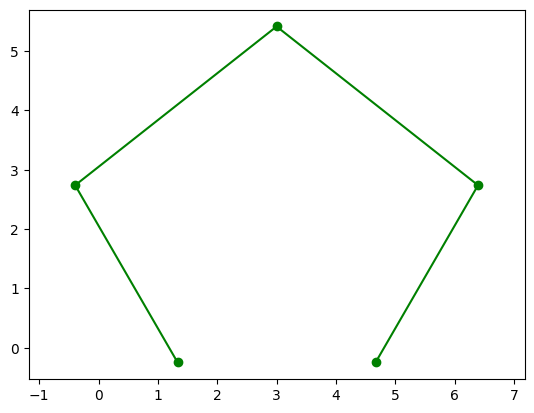

ValueError: operands could not be broadcast together with shapes (6,2) (5,2) 

In [15]:
w = 1
scale = w * np.sqrt(2)

points = np.array([
    np.array([2, 1]),
    np.array([1, 2.5]),
    np.array([3, 4]),
    np.array([5, 2.5]),
    np.array([4, 1]),
    np.array([2, 1]),
])

# points = np.array([
#     np.array([2, 2]),
#     np.array([2, 5]),
#     np.array([5, 5]),
#     np.array([5, 2]),
#     np.array([2, 2]),
# ])

render(points)

r1 = []
r2 = []
for point, prev, next in concat(points):
    s1 = next - point
    s1 = s1 / np.linalg.norm(s1)

    s2 = prev - point
    s2 = s2 / np.linalg.norm(s2)

    angle1 = get_angle_half(s1, s2)
    angle2 = get_angle_half(s1, s2, True)

    rr1 = scale * rotate(s1, angle1) + point
    rr2 = scale * rotate(s2, angle2) + point

    r1.append(rr1)
    r2.append(rr2)

render(r1, 'red')
render(r2, 'green')

render(points + r2, 'blue')
